<a href="https://colab.research.google.com/github/itsGab/mae_dinah/blob/main/nb_aux/db_mae_dinah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza e tratamento


## 1. importações dos pacotes/bibliotecas

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# parametros matplotlib
mpl.rcParams['figure.figsize'] = (12, 6)

## 2. importação dos dados

In [5]:
dados = '/content/drive/MyDrive/Bootcamp Data Science Aplicada 2 Alura/dados full covid 19/caso_full.csv'
covid = pd.read_csv(dados)
covid.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


## 3. tratamento inicial (tradução e **plus**)

In [6]:
traduz = {
    'city': 'cidade', 
    'city_ibge_code': 'cod_ibge_cidade', 
    'date': 'datahora', 
    'epidemiological_week': 'semana_epidemiologica',
    'estimated_population': 'populacao_estimada', 
    'estimated_population_2019': 'populacao_estimada_2019', 
    'is_last': 'eh_ultimo',
    'is_repeated': 'eh_repetido', 
    'last_available_confirmed': 'ultimo_disponivel_confirmado',
    'last_available_confirmed_per_100k_inhabitants': 'ultimo_disponivel_confirmado_por_100mil_habitantes', 
    'last_available_date': 'ultimo_disponivel_datahora',
    'last_available_death_rate': 'ultimo_disponivel_taxa_mortalidade', 
    'last_available_deaths': 'ultimo disponivel obitos', 
    'order_for_place': 'ordem_por_lugar',
    'place_type': 'tipo_de_lugar', 
    'state': 'estado', 
    'new_confirmed': 'casos_novos', 
    'new_deaths': 'obitos_novos'
}
covid.columns = covid.columns.map(traduz)
covid['tipo_de_lugar'] = covid['tipo_de_lugar'].map(traduz)
covid['datahora'] = pd.to_datetime(covid['datahora'])
covid['mes'] = covid['datahora'].dt.month
covid['dia'] = covid['datahora'].dt.day
covid['ano'] = covid['datahora'].dt.year
covid.head()

,cidade,cod_ibge_cidade,datahora,semana_epidemiologica,populacao_estimada,populacao_estimada_2019,eh_ultimo,eh_repetido,ultimo_disponivel_confirmado,ultimo_disponivel_confirmado_por_100mil_habitantes,ultimo_disponivel_datahora,ultimo_disponivel_taxa_mortalidade,ultimo disponivel obitos,ordem_por_lugar,tipo_de_lugar,estado,casos_novos,obitos_novos,mes,dia,ano
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,cidade,AC,3,0,3,17,2020
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,estado,AC,3,0,3,17,2020
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,cidade,AC,0,0,3,18,2020
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,estado,AC,0,0,3,18,2020
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,cidade,AC,1,0,3,19,2020


## 4. dividindo banco de dados

Apenas dados do **estado** Paraná:

In [50]:
covid_estado_parana = covid.query('estado == "PR" & tipo_de_lugar == "estado"')
linhas, colunas = covid_estado_parana.shape
print(f'São {linhas} linhas')

São 464 linhas


**Todas as cidade** no Paraná:


In [63]:
covid_cidades_parana = covid.query('estado == "PR" & tipo_de_lugar == "cidade"')
n_estados = covid_cidades_parana['cidade'].nunique()
print(f'São {n_estados} estados')
# adicionar o casos acumulados???

São 400 estados


Apenas a cidade de **Curitiba / PR**

In [52]:
covid_curitiba = covid_cidades_parana.query('cidade == "Curitiba"')
linhas, colunas = covid_curitiba.shape
print(f'São {linhas} linhas')

São 464 linhas


Adicionando ```['casos_acumulados']``` aos dataframes: ```covid_estado_parana``` & ```covid_curitiba```

In [75]:
covid_estado_parana['casos_acumulados'] = covid_estado_parana['casos_novos'].cumsum()
covid_curitiba['casos_acumulados'] = covid_curitiba['casos_novos'].cumsum()

## 5. plots

In [108]:
def plot_principais(df, titulo=''):
    fig, ax = plt.subplots(nrows=3, figsize=(12, 20))
    fig.suptitle(titulo)
    sns.lineplot(y='casos_novos', x='datahora', data=df, ax=ax[0])
    sns.lineplot(y='casos_acumulados', x='datahora', data=df, ax=ax[1])
    sns.lineplot(y='casos_acumulados', x='datahora', data=df, ax=ax[2])
    plt.yscale('log')
    ax[0].set_title('Casos novos')
    ax[1].set_title('Casos acumulados')
    ax[2].set_title('Log - Casos acumulados')

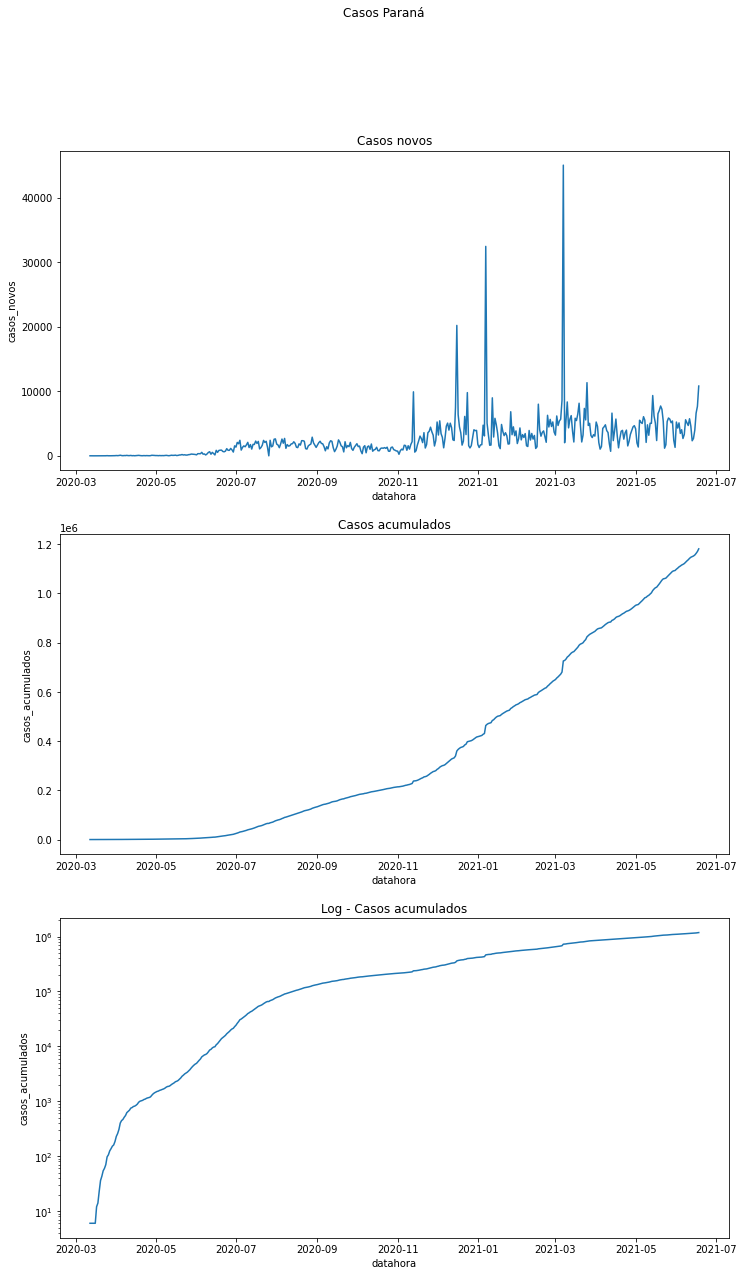

In [109]:
plot_principais(covid_estado_parana, 'Casos Paraná')

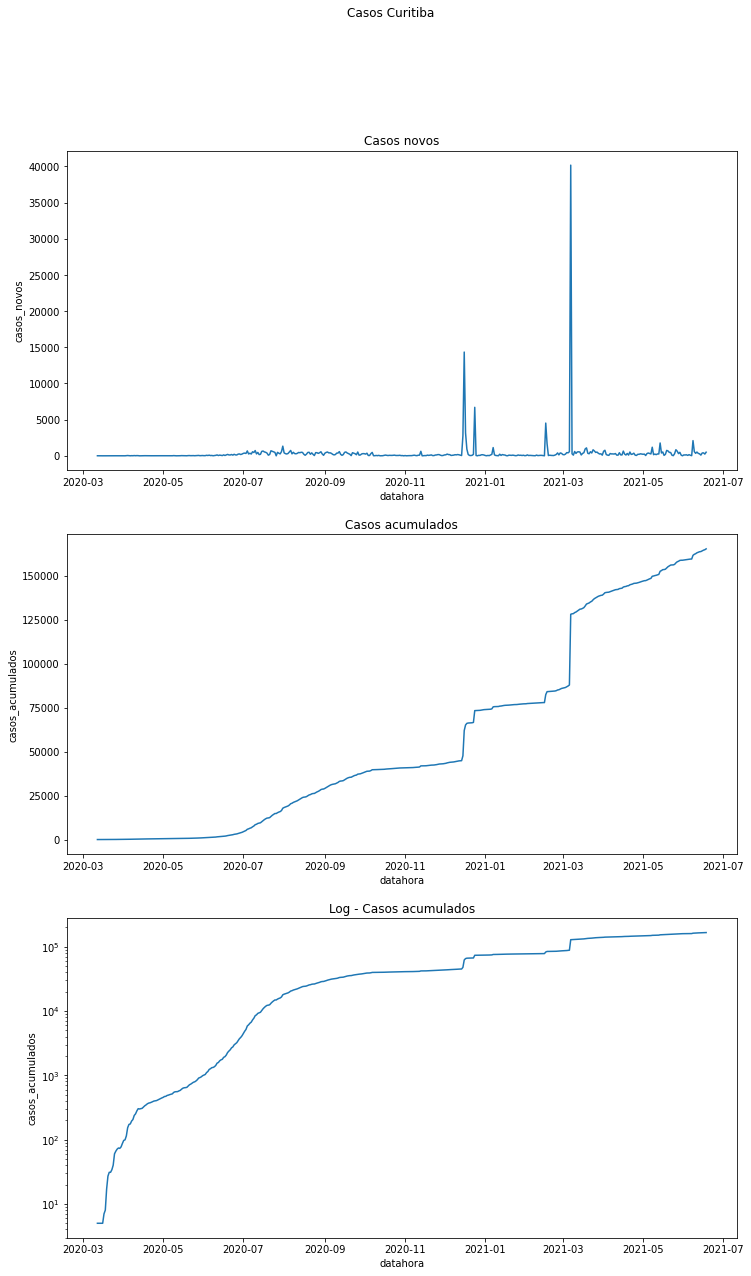

In [110]:
plot_principais(covid_curitiba, 'Casos Curitiba')